<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/my_first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recuerda que puedes cambiar el procesamieno de la nube a que se realice con la gpu en lugar de una cpu


*   Selecciona el apatartado de Runtime
*   Change runtime type
*   Seleccionar que por gpu






## Importar librerías

In [29]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Importar los datos de entrenamiento y visualizarlos

---



In [30]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [31]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
train_data.shape

(60000, 28, 28)

In [33]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Podemos ver cómo está conformado en tamaño los datos y las imagenes, pero vams a llamarlo en un imshow para poder visualizar uno de los ejemplos

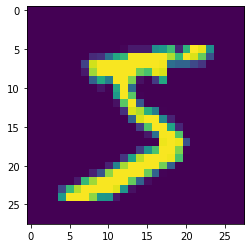

In [34]:
plt.imshow(train_data[0])

Corroboramos la información con los labels

In [35]:
train_labels[0]

5

## Creación de la Neural Network

Ahora podemos comenzar a crear la neural network

In [36]:
model = models.Sequential()
#Una vez creado hay que agregarle las capas, en este caso esta sería de 512 neuronas
model.add(layers.Dense(512,activation= "relu", input_shape=(28*28,) ))

#aquí estamos añadiendo otra capa pero con 10 neuronas, estos porque tenemos
#solamente 10 posibles resultados (del 0 al 9)
model.add(layers.Dense(10,activation="softmax"))



Ahora vamos a compilar la red neuronal

In [37]:
model.compile(optimizer= "rmsprop",
              loss= "categorical_crossentropy",
              metrics= "accuracy")

Ahora gracas a Keras podemos ver un summary de nustra red par ver su conformación

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Entrenar los datos

### Primer hay que redimensionar los datos de entrenamiento

Como recordamos eran 60000 registros con 28 y 28
lo ideal sería dejarlo en 2 dimensiones en lugar de tres que es como se tiene ahorita, así que procedemos a redimensionar

In [39]:
x_train = train_data.reshape((60000,28*28))

x_train = x_train.astype("float32")/255 
#Se cambia a float por resultar más practico en redes neuronales los decimales
# Se divide entre 255 por ser el numero máximo a alcanzar de pixeles

x_test = test_data.reshape((10000,28*28))

x_test = x_test.astype("float32")/255 

In [41]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Hay que de igual manera redimensionar para los label

In [42]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [43]:
train_labels[0]

5

In [44]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Como podemos ver nos trae un vector con las posibles 10 opciones, poniendonos un "1" en donde coincide lo que se espera, un 5